# Feature Engineering 
These are process carried out on our feature/columns to enable our algorithms learn or enhance its learning which in turn increases our model's accuracy, these processes includes, creating additional columns or removing from columns, column transformation, reshaping and so on.

### Some of the processes are as follows :
- Encoding
- Treating Outliers
- Handling missing data.
- feature Scaling 
- Binning.
- Feature Imputation.
- Feature Selection
- Dealing with Label Imbalance (Classification task).
- PCA and so on.
- Dealing with date time features

Interestingly, most of these processes has been discussed in earlier classes, we will only be discussing in bits about **Binning**, **Feature Selection** and **Label Imbalance** 

- **Binning** : This happens in numerical and categorical features when classes in a feature or discrete and contineous features are converted to either discrete numbers by capping certain ranges and replacing with a certain values or replacing with a categorical class.
- **Feature Selection** : Select particular relevant features in the dataframe and use that to train the algorithm.
- **Label Imbalance** : These are determined by the label/target column distribution in classification problems, when one or some of the classes are Under represented which makes the other Over represented,This Scenerio makes the algorithm predict some of the under represented classes as the over represented ones since it over learnt the more represented class. So we have to balance the classes in the column using some technics.

### Lets practice !!!

In [1]:
### Lets Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE
import random

In [2]:
### Lets generate datasets

max_row = 40
max_int = 75
lowest_int = 18
Age = [random.randrange(lowest_int,max_int) for i in range(max_row)]
Months = [random.randrange(lowest_int,360) for i in range(max_row)]
print(Age, Months)

[65, 46, 19, 25, 45, 73, 74, 72, 47, 64, 24, 36, 31, 30, 55, 48, 48, 64, 59, 62, 58, 63, 57, 43, 69, 20, 29, 69, 20, 62, 41, 29, 59, 28, 37, 33, 40, 36, 70, 68] [120, 29, 203, 234, 70, 337, 178, 106, 283, 186, 200, 274, 226, 329, 355, 30, 284, 186, 122, 65, 296, 73, 58, 46, 222, 108, 75, 288, 141, 46, 274, 193, 270, 38, 92, 202, 18, 216, 172, 263]


In [3]:
#Generate for categorical columns
states = []
states_list = ['Kogi','Kwara','Nasarrawa','Niger','Osun','Enugu','Imo','Lagos','Oyo','Anambra','Ogun','Abia','Kano','Kaduna','Sokoto','Zamfara']
certs = []
certs_list = ['Bsc','Phd','Masters']
for i in range(0, max_row):
    state = random.choice(states_list)
    states.append(state)
for i in range(0, max_row):
    cert = random.choice(certs_list)
    certs.append(cert)

In [4]:
## Generate Data Frame
framed = pd.DataFrame({"Age":Age,"Month":Months,"States":states,"Certificate" : certs})
framed['Level'] = (np.ceil(framed['Month']/ random.randrange(18, 30))).astype('int')
salaries = []
for i in range(len(framed)) :
    if framed['Certificate'][i] == 'Phd' and framed['Level'][i] >= 10 \
        or framed['Month'][i] > 250 and framed['Age'][i] > 46 :
        salaries.append(random.randrange(750000,1500000))
    elif framed['Certificate'][i] == 'Masters' and 5 < framed['Level'][i] < 10 \
        or  50 < framed['Month'][i] < 250 and framed['Age'][i] > 30 :
        salaries.append(random.randrange( 400000,740000))
    else :
        salaries.append(random.randrange( 120000,390000))
        
framed['Salary'] = salaries   

status = []
for i in framed['Salary'] :
    if i > 1000000 :
        status.append('High')
    else :
        status.append('Not_High')
framed['Status'] = status

In [5]:
framed

,Age,Month,States,Certificate,Level,Salary,Status
0,65,120,Enugu,Masters,5,705764,Not_High
1,46,29,Kwara,Phd,2,295877,Not_High
2,19,203,Zamfara,Masters,8,551042,Not_High
3,25,234,Kano,Masters,9,515103,Not_High
4,45,70,Zamfara,Phd,3,618815,Not_High
5,73,337,Imo,Masters,13,1354983,High
6,74,178,Anambra,Bsc,7,541938,Not_High
7,72,106,Imo,Masters,4,609052,Not_High
8,47,283,Niger,Masters,11,1070579,High
9,64,186,Enugu,Masters,7,685266,Not_High


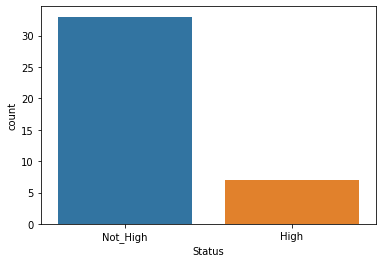

In [6]:
sns.countplot(data = framed, x='Status')
plt.show()

In [7]:
framed['Status'].replace('High',1,inplace=True)
framed['Status'].replace('Not_High',0,inplace=True)

In [8]:
framed['Certificate'].replace('Phd',3,inplace=True)
framed['Certificate'].replace('Masters',2,inplace=True)
framed['Certificate'].replace('Bsc',1,inplace=True)

For Feature Selection, we will be treating two methods :
- Use of Heatmap
- Use of SelectKBest

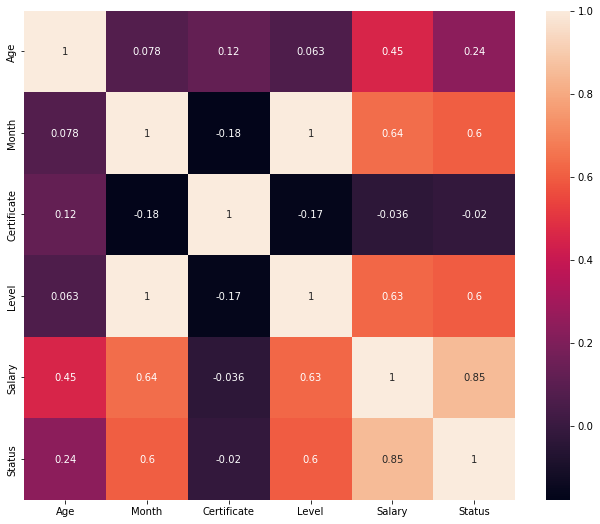

In [9]:
## Heatmap to check for relevant columns
plt.subplots(figsize=(11, 9))
sns.heatmap(framed.corr(), annot=True)
plt.show()

In [10]:
### Select KBest to check for relevant columns,for feature Selection
cols = ['States','Status']
X = framed.drop(cols, axis=1)
y= framed['Status']
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['features','scores']
feature_scores

,features,scores
0,Age,1.359216e+01
1,Month,8.015449e+02
2,Certificate,4.030452e-03
3,Level,2.722117e+01
4,Salary,5.089630e+06


We are treating three methods of Binning which are :
- Numerical to Categorical
- Numerical to Numerical
- Categorical to Categorical

In [11]:
#Numerical Binning
min_Age = framed['Month'].min()
max_Age = framed['Month'].max()
print(min_Age,max_Age)

18 355


In [12]:
bins = np.linspace(min_Age,max_Age,3)
bins

array([ 18. , 186.5, 355. ])

In [13]:
labels = ['Beginner','Expert']
c_framed = framed.copy()
c_framed['Month_bins'] = pd.cut(c_framed['Month'], bins=bins, labels=labels, include_lowest=True)

In [14]:
c_framed

,Age,Month,States,Certificate,Level,Salary,Status,Month_bins
0,65,120,Enugu,2,5,705764,0,Beginner
1,46,29,Kwara,3,2,295877,0,Beginner
2,19,203,Zamfara,2,8,551042,0,Expert
3,25,234,Kano,2,9,515103,0,Expert
4,45,70,Zamfara,3,3,618815,0,Beginner
5,73,337,Imo,2,13,1354983,1,Expert
6,74,178,Anambra,1,7,541938,0,Beginner
7,72,106,Imo,2,4,609052,0,Beginner
8,47,283,Niger,2,11,1070579,1,Expert
9,64,186,Enugu,2,7,685266,0,Beginner


In [15]:
c_framed['Month_qbin'] = pd.qcut(c_framed['Month'],q=2,precision=1, labels=labels)

In [16]:
c_framed

,Age,Month,States,Certificate,Level,Salary,Status,Month_bins,Month_qbin
0,65,120,Enugu,2,5,705764,0,Beginner,Beginner
1,46,29,Kwara,3,2,295877,0,Beginner,Beginner
2,19,203,Zamfara,2,8,551042,0,Expert,Expert
3,25,234,Kano,2,9,515103,0,Expert,Expert
4,45,70,Zamfara,3,3,618815,0,Beginner,Beginner
5,73,337,Imo,2,13,1354983,1,Expert,Expert
6,74,178,Anambra,1,7,541938,0,Beginner,Beginner
7,72,106,Imo,2,4,609052,0,Beginner,Beginner
8,47,283,Niger,2,11,1070579,1,Expert,Expert
9,64,186,Enugu,2,7,685266,0,Beginner,Beginner


In [17]:
### Categorical Binning
geo_zone = []
for i in c_framed['States']:
    if i in ['Kogi','Kwara','Nasarrawa','Niger']:
        geo_zone.append('North Central')
    elif i in ['Lagos','Oyo','Osun','Ogun']:
        geo_zone.append('South West')
    elif i in ['Imo','Abia','Enugu','Anambra']:
        geo_zone.append('South East')
    elif i in ['Kano','Kaduna','Sokoto','Zamfara']:
        geo_zone.append('North West')
    else :
        geo_zone.append('Others')
c_framed['Geo_zones'] = geo_zone
c_framed

,Age,Month,States,Certificate,Level,Salary,Status,Month_bins,Month_qbin,Geo_zones
0,65,120,Enugu,2,5,705764,0,Beginner,Beginner,South East
1,46,29,Kwara,3,2,295877,0,Beginner,Beginner,North Central
2,19,203,Zamfara,2,8,551042,0,Expert,Expert,North West
3,25,234,Kano,2,9,515103,0,Expert,Expert,North West
4,45,70,Zamfara,3,3,618815,0,Beginner,Beginner,North West
5,73,337,Imo,2,13,1354983,1,Expert,Expert,South East
6,74,178,Anambra,1,7,541938,0,Beginner,Beginner,South East
7,72,106,Imo,2,4,609052,0,Beginner,Beginner,South East
8,47,283,Niger,2,11,1070579,1,Expert,Expert,North Central
9,64,186,Enugu,2,7,685266,0,Beginner,Beginner,South East


In [18]:
framed

,Age,Month,States,Certificate,Level,Salary,Status
0,65,120,Enugu,2,5,705764,0
1,46,29,Kwara,3,2,295877,0
2,19,203,Zamfara,2,8,551042,0
3,25,234,Kano,2,9,515103,0
4,45,70,Zamfara,3,3,618815,0
5,73,337,Imo,2,13,1354983,1
6,74,178,Anambra,1,7,541938,0
7,72,106,Imo,2,4,609052,0
8,47,283,Niger,2,11,1070579,1
9,64,186,Enugu,2,7,685266,0


In [19]:
sam_framed = framed.copy()
sam_framed

,Age,Month,States,Certificate,Level,Salary,Status
0,65,120,Enugu,2,5,705764,0
1,46,29,Kwara,3,2,295877,0
2,19,203,Zamfara,2,8,551042,0
3,25,234,Kano,2,9,515103,0
4,45,70,Zamfara,3,3,618815,0
5,73,337,Imo,2,13,1354983,1
6,74,178,Anambra,1,7,541938,0
7,72,106,Imo,2,4,609052,0
8,47,283,Niger,2,11,1070579,1
9,64,186,Enugu,2,7,685266,0


There Are several methods for treating data Imbalances, and we will be treating three in this class.
- Over Sampling : Adds more instances/rows from the minority class
- Under Sampling : Removes Instances/rows from the Majority class
- Over Sampling minority class using Synthetic Minority Oversampling Technique(SMOTE) : Generate more instances to increase the minority class.

In [20]:
### Treating Data Imbalances
sam_X = sam_framed.drop('Status', axis=1)
sam_y= sam_framed['Status']

In [21]:
Ros = RandomOverSampler()
X_over, y_Over = Ros.fit_resample(sam_X,sam_y)

In [22]:
Ros_framed = X_over.join(y_Over, how='outer')

In [23]:
Ros_framed['Status'].value_counts()

0    33
1    33
Name: Status, dtype: int64

In [24]:

Rus = RandomUnderSampler()
X_under, y_under = Rus.fit_resample(sam_X,sam_y)
Rus_framed = X_under.join(y_under, how='outer')

In [25]:
Rus_framed['Status'].value_counts()

0    7
1    7
Name: Status, dtype: int64

In [26]:
som_X = sam_framed.drop(cols, axis=1)
som_y= sam_framed['Status']
Smo = SMOTE(sampling_strategy='minority')
X_smo, y_smo = Smo.fit_resample(som_X,som_y)
Smo_framed = X_smo.join(y_smo, how='outer')
Smo_framed['Status'].value_counts()

0    33
1    33
Name: Status, dtype: int64

In [27]:
df = pd.read_csv('Loan prediction train.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [29]:
df.fillna(method='ffill',inplace=True)
df.fillna(method='backfill',inplace=True)

In [30]:
df['Dependents'].value_counts()

0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64

In [31]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Education'].replace('Graduate',1,inplace=True)
df['Education'].replace('Not Graduate',0,inplace=True)
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)
df['Married'].replace('Yes',1,inplace=True)
df['Married'].replace('No',0,inplace=True)
df['Self_Employed'].replace('Yes',1,inplace=True)
df['Self_Employed'].replace('No',0,inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [33]:
cols = ['Loan_ID','Dependents','Property_Area','Loan_Status']
X = df.drop(cols, axis=1)
y= df['Loan_Status']
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['features','scores']
feature_scores

,features,scores
0,Gender,0.017005
1,Married,1.697853
2,Education,0.988390
3,Self_Employed,0.043097
4,ApplicantIncome,93.904964
5,CoapplicantIncome,11342.041603
6,LoanAmount,63.338684
7,Loan_Amount_Term,8.617666
8,Credit_History,27.854204


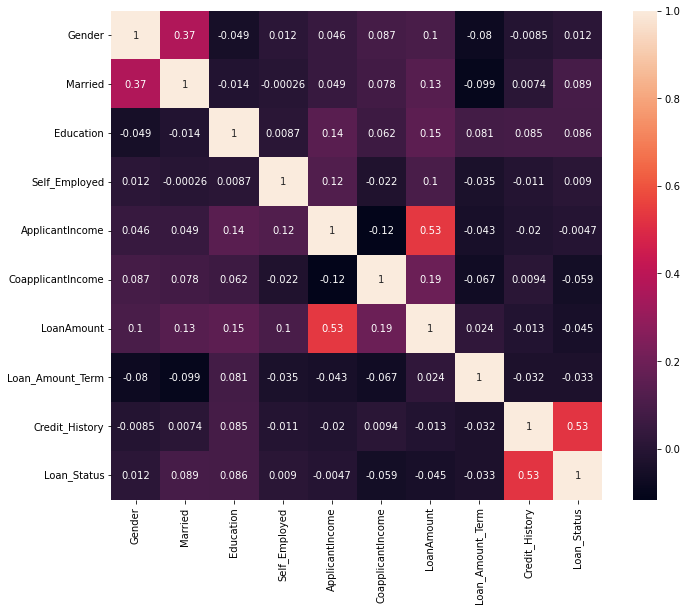

In [34]:
plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [35]:
df['Credit_History_qbin'] = pd.qcut(df['LoanAmount'],q=2,precision=1, labels=['Low','High'])

In [36]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History_qbin
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1,Low
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,Low
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,Low
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,Low
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,Low
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,Low
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,High
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,High


In [37]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [38]:
area = []
for i in df['Property_Area']:
    if i in ['Urban','Semiurban']:
        area.append('Urban')
    elif i in 'Rural':
        area.append('Rural')
    else :
        area.append('Others')
df['Area'] = area
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History_qbin,Area
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1,Low,Urban
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,Low,Rural
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,Low,Urban
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,Low,Urban
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,High,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,Low,Rural
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,Low,Rural
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,High,Urban
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,High,Urban


In [39]:
sam_X = df.drop('Loan_Status', axis=1)
sam_y= df['Loan_Status']

In [40]:
Ros = RandomOverSampler()
X_over, y_Over = Ros.fit_resample(sam_X,sam_y)
Ros_df = X_over.join(y_Over, how='outer')
Ros_df['Loan_Status'].value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [41]:
Rus = RandomUnderSampler()
X_under, y_under = Rus.fit_resample(sam_X,sam_y)
Rus_df = X_under.join(y_under, how='outer')
Rus_y = Rus_df['Loan_Status']

In [42]:
cols = ['Loan_ID','Dependents','Property_Area','Loan_Status','Credit_History_qbin','Area']
X = df.drop(cols, axis=1)
y= df['Loan_Status']
Smo = SMOTE(sampling_strategy='minority')
X_smo, y_smo = Smo.fit_resample(X,y)
Smo_df = X_smo.join(y_smo, how='outer')
Smo_df['Loan_Status'].value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Data Splitting

When we are given a Supervised Machine Learning Project which we will be considering in this class. It mostly is about Model building and one of the most important thing in model building is **Data Spliting**.

**Data Splitting** This is when a data set is splitted to segments in order to be able to train and evaluate the trained algorithm (model) using data from the same data set, This is mainly to test how the model generalises with new data.

**Data** are Splitted into sets, these are sets that data can be splitted into :
 - The Training set : Which is used to train the algorithm, this takes larger percentage of the data so that the algorithm will learn well.
 - The Test set : This set is used to test the trained model on how it generalizes on new data.
 
 Data are splitted with train set taking the larger percentage, some uses (70/30, 75/25, 80/20) and so on depending on the amount of data, even there can be 98/2 if the data is over a million rows.
 
 Data Scientists works sometimes and splits train sets into train and evaluation/test sets to be able to cross validate or develop the model to a robust state.
 
 **NB** In competitions Validation and train set are given together as train data, then features for the test set will be given and the label witheld by the organiser to later test the trained model then decide one's position on the leader board.
 
 We will be using two methods tonight, which are 
 - train_test_split 
 - KFold
 
 ### Lets practice

In [43]:
### Import Libraries
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [44]:
train_sam_X,test_sam_X,train_sam_y,test_sam_y = train_test_split(sam_X,sam_y,random_state=42,test_size=0.2,stratify=sam_y)

In [45]:
print(train_sam_X.shape)
print(test_sam_X.shape)
print(train_sam_y.shape)
print(test_sam_y.shape)

(491, 14)
(123, 14)
(491,)
(123,)


Using KFold, We have three methods :
- Leave one out KFold
- KFold
- Stratified KFold

In [46]:
## Using Kfold
kf = KFold(n_splits=4, shuffle=True, random_state=1)
K_train = []
K_test = []
for train_index, test_index in kf.split(Rus_df):
    K_train.append(train_index)
    K_test.append(test_index)
Kfold = pd.DataFrame({"KTrain":K_train,'KTest':K_test})
Kfold

,KTrain,KTest
0,"[0, 1, 2, 3, 7, 8, 9, 10, 12, 14, 15, 16, 19, ...","[4, 5, 6, 11, 13, 17, 18, 23, 27, 41, 62, 65, ..."
1,"[1, 2, 3, 4, 5, 6, 7, 10, 11, 13, 15, 17, 18, ...","[0, 8, 9, 12, 14, 16, 19, 28, 29, 31, 34, 38, ..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[10, 21, 24, 32, 33, 35, 36, 40, 45, 46, 47, 4..."
3,"[0, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17,...","[1, 2, 3, 7, 15, 20, 22, 25, 26, 30, 37, 43, 4..."


In [47]:
### Using Stratified Kfold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
train = []
test = []
for train_index, test_index in skf.split(Rus_df, Rus_y):
    train.append(train_index)
    test.append(test_index)
    

In [48]:
sKfold = pd.DataFrame({"Train":train,'Test':test})

In [49]:
sKfold

,Train,Test
0,"[1, 2, 4, 6, 7, 8, 9, 10, 11, 14, 15, 17, 19, ...","[0, 3, 5, 12, 13, 16, 18, 20, 21, 35, 36, 37, ..."
1,"[0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...","[1, 7, 15, 17, 24, 27, 28, 30, 32, 33, 47, 54,..."
2,"[0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 15, 16, 1...","[6, 8, 11, 14, 22, 25, 29, 31, 40, 49, 53, 58,..."
3,"[0, 1, 3, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, ...","[2, 4, 9, 10, 19, 23, 26, 34, 38, 39, 41, 42, ..."


In [50]:
help(stratifiedKFold())

NameError: name 'stratifiedKFold' is not defined